In [14]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
feature_dict = {i:label for i,label in zip(range(4),["sepal length in cm",
                                                    "sepal width in cm",
                                                    "petal length in cm",
                                                    "petal width in cm"])}

In [4]:
display(feature_dict)

{0: 'sepal length in cm',
 1: 'sepal width in cm',
 2: 'petal length in cm',
 3: 'petal width in cm'}

In [5]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [18]:
df = pd.DataFrame(np.concatenate((iris["data"], iris["target"].reshape(-1, 1)), axis=1), columns=iris.feature_names + ["class label"])

In [19]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class label
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [30]:
df["class label"] = df["class label"].where(df["class label"] != 0.0, other="iris-setosa").where(df["class label"] != 1.0, other="iris-versicolor").where(df["class label"] != 2.0, other="iris-virginica")

In [33]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class label           object
dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder

In [39]:
X = df.iloc[:, [0,1,2,3]].values
y = df["class label"].values

lenc = LabelEncoder()
y = lenc.fit_transform(y)

In [41]:
label_dict = {0:"Setosa", 1:"Versicolor", 2:"Virginica"}
attr_dict = {0:"sepal length", 1:"sepal width", 2:"petal length", 3:"petal width"}

In [42]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

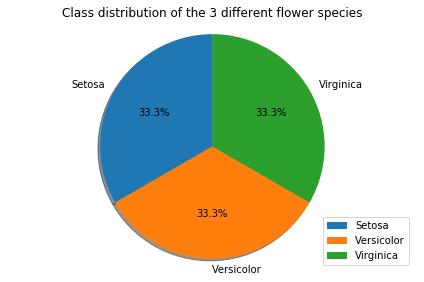

In [56]:
plt.pie([X[y==i].shape[0] for i in range(3)],labels=[label_dict[i] for i
in range(3)], shadow=True, startangle=90, autopct="%1.1f%%")

plt.title("Class distribution of the 3 different flower species")
plt.legend(loc="lower right")
plt.axis("equal")
plt.tight_layout()